In [1]:
%matplotlib inline

In [2]:
#dependancies
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd



In [17]:
#import files from data analysis
into = "output/Regionsinto.csv"
intodf = pd.read_csv(into)
outof = "output/Regionsout.csv"
outofdf = pd.read_csv(outof)
dvin = "output/Regionsdvinto.csv"
dvindf = pd.read_csv(dvin)
dvindf

,Website Region,Period,Rate
0,Goldfields-Esperance District,2020-05-01,12.876405
1,Great Southern District,2020-05-01,-4.918597
2,Kimberley District,2020-05-01,86.348570
3,Metropolitan Region,2020-05-01,-7.894737
4,Mid West-Gascoyne District,2020-05-01,-49.259518
5,Pilbara District,2020-05-01,4.831462
6,South West District,2020-05-01,1.668604
7,Western Australia,2020-05-01,-5.781734
8,Wheatbelt District,2020-05-01,-19.063960


In [11]:
#import police district polygons
path = 'datasource/Police_Districts.shp'
#use geopandas to read mapping file and convert to dataframe
districts = gpd.read_file(path)
#added colours to help identify regions
colours = ['b','g','r','c','m','y','w','k','saddlebrown','pink','slategray','lime','orange','darkviolet','olive']
names = ['Metropolitan Region','Metropolitan Region','Metropolitan Region','Metropolitan Region','Metropolitan Region','Metropolitan Region','Metropolitan Region','Metropolitan Region','South West District','Great Southern District','Wheatbelt District','Mid West-Gascoyne District','Goldfields-Esperance District','Pilbara District','Kimberley District']
districts['colours'] = colours
#matched districts with colours
districts['Website Region'] = names


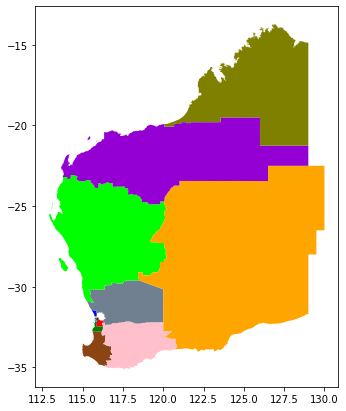

In [12]:
#plot using matplotlib
districts.plot(color = districts['colours'],figsize=(12,7))
plt.show()

In [13]:
districts

,geometry,colours,Website Region
0,"POLYGON ((115.68175 -31.47691, 115.68467 -31.4...",b,Metropolitan Region
1,"MULTIPOLYGON (((115.89872 -32.18033, 115.90067...",g,Metropolitan Region
2,"POLYGON ((115.98349 -32.00971, 115.98364 -32.0...",r,Metropolitan Region
3,"MULTIPOLYGON (((115.84468 -32.00154, 115.84453...",c,Metropolitan Region
4,"POLYGON ((115.75992 -31.90809, 115.75992 -31.9...",m,Metropolitan Region
5,"POLYGON ((115.83165 -31.84572, 115.83195 -31.8...",y,Metropolitan Region
6,"POLYGON ((116.05442 -31.60022, 116.05442 -31.6...",w,Metropolitan Region
7,"POLYGON ((115.97852 -31.92114, 115.98165 -31.9...",k,Metropolitan Region
8,"POLYGON ((116.01948 -32.75648, 116.01964 -32.7...",saddlebrown,South West District
9,"MULTIPOLYGON (((117.94801 -34.99529, 117.94797...",pink,Great Southern District


In [14]:
#merged districts with crime data 
merged = pd.merge(districts,intodf,on='Website Region',how='left')

In [15]:
merged

,geometry,colours,Website Region,Period,Rate
0,"POLYGON ((115.68175 -31.47691, 115.68467 -31.4...",b,Metropolitan Region,2020-05-01,-242.263158
1,"MULTIPOLYGON (((115.89872 -32.18033, 115.90067...",g,Metropolitan Region,2020-05-01,-242.263158
2,"POLYGON ((115.98349 -32.00971, 115.98364 -32.0...",r,Metropolitan Region,2020-05-01,-242.263158
3,"MULTIPOLYGON (((115.84468 -32.00154, 115.84453...",c,Metropolitan Region,2020-05-01,-242.263158
4,"POLYGON ((115.75992 -31.90809, 115.75992 -31.9...",m,Metropolitan Region,2020-05-01,-242.263158
5,"POLYGON ((115.83165 -31.84572, 115.83195 -31.8...",y,Metropolitan Region,2020-05-01,-242.263158
6,"POLYGON ((116.05442 -31.60022, 116.05442 -31.6...",w,Metropolitan Region,2020-05-01,-242.263158
7,"POLYGON ((115.97852 -31.92114, 115.98165 -31.9...",k,Metropolitan Region,2020-05-01,-242.263158
8,"POLYGON ((116.01948 -32.75648, 116.01964 -32.7...",saddlebrown,South West District,2020-05-01,-26.697666
9,"MULTIPOLYGON (((117.94801 -34.99529, 117.94797...",pink,Great Southern District,2020-05-01,-157.395111


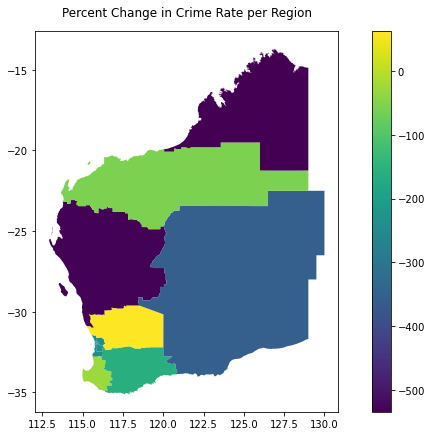

In [16]:
#plot crime rate to map
merged.plot(column = merged['Rate'],figsize=(12,7),legend=True)
plt.title("Percent Change in Crime Rate per Region", pad=15)
plt.savefig("output/crimemap.png",bbox_inches='tight')
plt.show()

In [18]:
#merge districts to domestic violnce rates
mergeddv = pd.merge(districts,dvindf,on='Website Region',how='left')

mergeddv

,geometry,colours,Website Region,Period,Rate
0,"POLYGON ((115.68175 -31.47691, 115.68467 -31.4...",b,Metropolitan Region,2020-05-01,-7.894737
1,"MULTIPOLYGON (((115.89872 -32.18033, 115.90067...",g,Metropolitan Region,2020-05-01,-7.894737
2,"POLYGON ((115.98349 -32.00971, 115.98364 -32.0...",r,Metropolitan Region,2020-05-01,-7.894737
3,"MULTIPOLYGON (((115.84468 -32.00154, 115.84453...",c,Metropolitan Region,2020-05-01,-7.894737
4,"POLYGON ((115.75992 -31.90809, 115.75992 -31.9...",m,Metropolitan Region,2020-05-01,-7.894737
5,"POLYGON ((115.83165 -31.84572, 115.83195 -31.8...",y,Metropolitan Region,2020-05-01,-7.894737
6,"POLYGON ((116.05442 -31.60022, 116.05442 -31.6...",w,Metropolitan Region,2020-05-01,-7.894737
7,"POLYGON ((115.97852 -31.92114, 115.98165 -31.9...",k,Metropolitan Region,2020-05-01,-7.894737
8,"POLYGON ((116.01948 -32.75648, 116.01964 -32.7...",saddlebrown,South West District,2020-05-01,1.668604
9,"MULTIPOLYGON (((117.94801 -34.99529, 117.94797...",pink,Great Southern District,2020-05-01,-4.918597


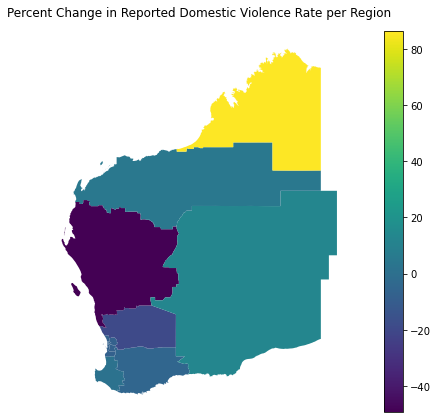

In [19]:
#plot map of domestic violence per region
mergeddv.plot(column = mergeddv['Rate'],figsize=(12,7),legend=True)
plt.title("Percent Change in Reported Domestic Violence Rate per Region", pad=15)
plt.axis('off')
plt.savefig("output/dvmap.png",bbox_inches='tight')
plt.show()